<a href="https://colab.research.google.com/github/srinivasiyengar/srinivas/blob/master/KDAG_KNN_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References


                                
*   https://www.edureka.co/blog/k-nearest-neighbors-algorithm/
*   https://github.com/sagarmk/Knn-from-scratch/blob/master/knn.py
*   https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
*   http://www.data-machine.net/nmtutorial/distanceweightedknnalgorithm.htm
*   https://www.geeksforgeeks.org/implementation-k-nearest-neighbors/
*   https://dataaspirant.com/k-nearest-neighbor-algorithm-implementaion-python-scratch/



# K-NEAREST NEIGHBOURS


# Importing libraries







In [1]:
import numpy as np
import pandas as pd
from random import randrange
import math
from math import sqrt
import operator 
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 

In [2]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=a07b58c8f8ae6992f797ad4dd83aa8fe6ecc1c11d07a3f2ec7f934bc41e03b39
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
!wget https://github.com/srinivasiyengar/srinivas/raw/master/breast_cancer.csv

--2020-11-25 17:28:38--  https://github.com/srinivasiyengar/srinivas/raw/master/breast_cancer.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/srinivasiyengar/srinivas/master/breast_cancer.csv [following]
--2020-11-25 17:28:38--  https://raw.githubusercontent.com/srinivasiyengar/srinivas/master/breast_cancer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120924 (118K) [text/plain]
Saving to: ‘breast_cancer.csv’

breast_cancer.csv   100%[===================>] 118.09K  --.-KB/s    in 0.008s  

2020-11-25 17:28:38 (14.1 MB/s) - ‘breast_cancer.csv’ saved [120924/120924]



In [4]:
dset = pd.read_csv('breast_cancer.csv')

# Understanding the dataset





In [5]:
dset.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

#Label-Encoding

In [6]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
dset['diagnosis']= label_encoder.fit_transform(dset['diagnosis'])

#Correlation-Matrix

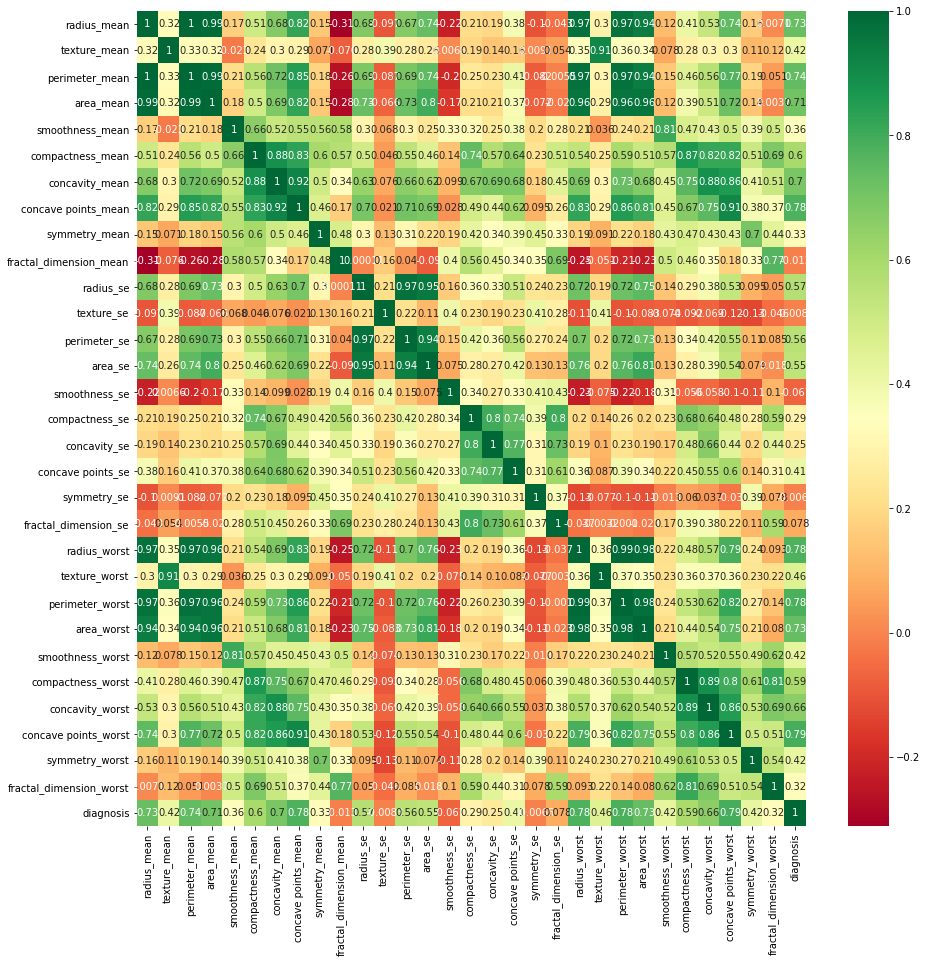

In [7]:
corr = dset.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,15))
g=sns.heatmap(dset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Getting the Valuable Features

In [8]:
def valuable_features(dset):
  corr = dset.corr()
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]-1):
        if corr.iloc[len(dset.columns)-1,i] <= 0.6:
                columns[i] = False
  selected_columns = dset.columns[columns]
  dset = dset[selected_columns]
  fig = plt.figure(figsize = (15, 15))
  for (i, j) in zip(dset.columns, range(len(dset.columns)-1)):
    plt.subplot(6, 4, j+1)
    sns.distplot(dset[i][dset['diagnosis']==0], color='y', label = 'benign')
    sns.distplot(dset[i][dset['diagnosis']==1], color='m', label = 'malignant')
    plt.legend(loc='best')
  fig.suptitle('Breast Cancer Data Vizualization') 
  fig.subplots_adjust(top=0.95)
  plt.show() 
  return dset

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

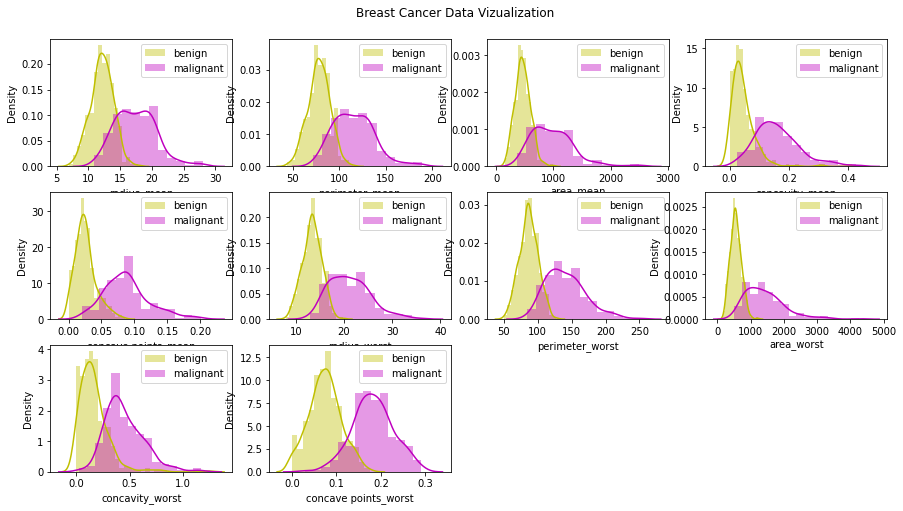

In [9]:
dset = valuable_features(dset)

# Normalization 






In [10]:
def zscore(data):
    (rows, cols) = data.shape
    media = np.zeros(shape=(cols), dtype=np.float32)
    sigma = np.zeros(shape=(cols), dtype=np.float32)
    for j in range(cols-1):
        media[j] = data.iloc[:,j].sum(axis=0)/rows
        sigma[j] = data.iloc[:,j].std(axis = 0)
    result = data
    for i in range(rows):
        for j in range(cols-1):
            result.iloc[i,j] = ((data.iloc[i,j] - media[j]) / sigma[j])
    return result

#**BUILDING THE KNN MODEL**




# Euclidean_distance
.           

In [11]:
#https://www.edureka.co/blog/k-nearest-neighbors-algorithm/

def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += pow((row1[i] - row2[i]), 2)  
  return math.sqrt(distance)

# get_neighbours


In [12]:
#https://dataaspirant.com/k-nearest-neighbor-algorithm-implementaion-python-scratch/
def get_neighbors(trainingSet, testInstance, k):
    distances = []
    for x in range(len(trainingSet)):
        dist = euclidean_distance(testInstance, trainingSet[x])
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    dist1 = []
    for x in range(k):
        neighbors.append(distances[x][0])
        dist1.append(distances[x][1])
    return (neighbors, dist1)

# Prediction 












In [13]:
def predict_classification(train, test_row, num_neighbors):
  neighbors = get_neighbors(train, test_row, num_neighbors)
  class_Votes = 0
  total_weight = 0
  neighbours_rows = list(neighbors[0])
  dist_dict = list(neighbors[1])
  for x in range(len(neighbours_rows)):
     response = neighbours_rows[x][-1]
     weight = 1/(dist_dict[x])
     weighted_response = response*weight
     class_Votes += weighted_response
     total_weight += weight
  output = class_Votes/total_weight
  if output > 0.5:
     return 1
  else:
     return 0

#k_nearest_neighbors_model

In [28]:
def k_nearest_neighbors_model(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)

# Performance


In [15]:
#https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_actual)): 
       if y_actual[i] == y_hat[i] == 1:
           TP += 1
       if y_hat[i] ==1 and y_actual[i] != y_hat[i]:
           FP += 1
       if y_actual[i] == y_hat[i] == 0:
           TN += 1
       if y_hat[i] == 0 and y_actual[i] != y_hat[i]:
           FN += 1
    precision = TP/(TP +FP)
    recall = TP/(TP + FN)
    F1_score = 2*precision*recall/(precision + recall)
    return F1_score
	

the **algorithm_evaluation** function takes in as input :the dataset ,the algorithm to be applied on the dataset,and the arguments of the algorithm, and gives the performance using the previously created functions.

In [27]:
#https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
def algorithm_evaluation(dset, algorithm, n_folds, *args):
  dset_split = list()
  dset_copy = list(dset)
  fold_size = int(len(dset) / n_folds)
  test_set = list()
  while len(test_set) < fold_size:
			index = randrange(len(dset_copy))
			test_set.append(dset_copy.pop(index))
  train_set = list(dset_copy)
  predicted = algorithm(train_set, test_set, *args)
  actual = [row[-1] for row in test_set]
  F1_score = perf_measure(actual, predicted)
  return F1_score

# Testing on dataset


In [17]:
dset = zscore(dset)

In [18]:
dset = dset.values.tolist()

In [19]:
n_folds = 5
num_neighbors = 5

In [29]:
score = algorithm_evaluation(dset, k_nearest_neighbors_model, n_folds, num_neighbors)

In [30]:
score

0.918918918918919

#Inference on unseen data

In [31]:
testset = []
testset =  pd.DataFrame(testset)  
breast_mass_1_characteristics = [{'radius_mean': 21.1, 'perimeter_mean': 137.2, 'area_mean': 1404.0, 
                          'concavity_mean': 0.1, 'concave points_mean': 0.0,'radius_worst': 29.1,
                          'perimeter_worst': 188.0, 'area_worst': 2615.0,'concavity_worst': 0.3,
                          'concave points_worst': 0.2}]
testset = testset.append(breast_mass_1_characteristics)
breast_mass_2_characteristics = [{'radius_mean': 14.5, 'perimeter_mean': 96.7, 'area_mean': 658.8, 
                          'concavity_mean': 0.1, 'concave points_mean': 0.0,'radius_worst': 17.4,
                          'perimeter_worst': 124.1, 'area_worst': 943.2,'concavity_worst': 0.7,
                          'concave points_worst': 0.1}]
testset = testset.append(breast_mass_2_characteristics)
breast_mass_3_characteristics = [{'radius_mean': 15.3, 'perimeter_mean': 102.4, 'area_mean': 732.4, 
                          'concavity_mean': 0.1, 'concave points_mean': 0.0,'radius_worst': 20.2,
                          'perimeter_worst': 149.3, 'area_worst': 1269.0,'concavity_worst': 0.6,
                          'concave points_worst': 0.2}]      
testset = testset.append(breast_mass_3_characteristics)
breast_mass_4_characteristics  = [{'radius_mean': 9.1, 'perimeter_mean': 59.2, 'area_mean': 260.9, 
                          'concavity_mean': 0.0, 'concave points_mean': 0.0,'radius_worst': 10.0,
                          'perimeter_worst': 65.5, 'area_worst': 310.1,'concavity_worst': 0.1,
                          'concave points_worst': 0.05}]
testset = testset.append(breast_mass_4_characteristics )
breast_mass_5_characteristics  = [{'radius_mean': 11.5, 'perimeter_mean': 73.3, 'area_mean': 409.0, 
                          'concavity_mean': 0.03, 'concave points_mean': 0.02,'radius_worst': 12.8,
                          'perimeter_worst': 81.8, 'area_worst': 506.2,'concavity_worst': 0.09,
                          'concave points_worst': 0.06}]
testset = testset.append(breast_mass_5_characteristics)


In [32]:
testset = zscore(testset)
testset = testset.values.tolist()

In [34]:
k_nearest_neighbors_model(dset, testset, 5)

[1, 1, 1, 0, 0]